# Project: Concrete Strength Prediction

#### Objective: To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

### Read and preprocess the dataset  

In [1]:
# import numpy, pandas, matplotlib and seabord libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the concrete.csv file and display the first 10 rows
df = pd.read_csv('C:/Users/Aylan/Documents/IT/AIML - UT Austin/Feature Selection, Model Selection and Tuning/Project Concrete Strength Prediction/concrete.csv')
df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [3]:
# print shape of the dataset
df.shape

(1030, 9)

In [4]:
# print the columns with missing values if any
df.isna().any()

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

#### Observations:
The dataset has 1030 rows and 9 columns. It has no missing values 

### Exploratory Data Quality Report

### 1. Univariate Analysis 

In [5]:
# print data types for each column
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [6]:
# print useful info about the dataset using df.info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


#### Observations:
All of the columns are of float type except the age column which is of integer type.

In [7]:
# print descriptive statistics using df.describe() function
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


#### Observations:
- All of the columns have numercal values.
- The maximum value of 'age' columns seems to be way above the mean and the 3rd quantile.

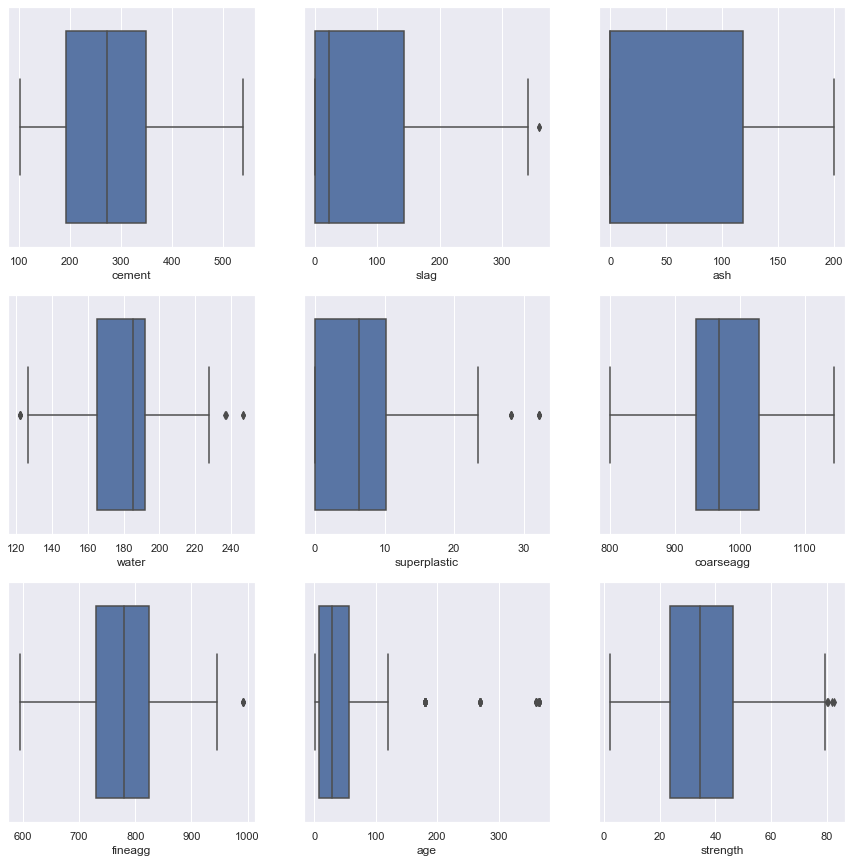

In [8]:
# display a boxplot for each attribute using for loop

plt.figure(figsize=(15,15))
col_name = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength'] 
position = 1
for col in col_name:
    plt.subplot(3, 3, position)
    sns.boxplot(df[col])
    position += 1
plt.show()

#### Observations:
- Attributes: slag, water, superplastic, fineagg, and strength have some outliers but age column has more number of outliers.


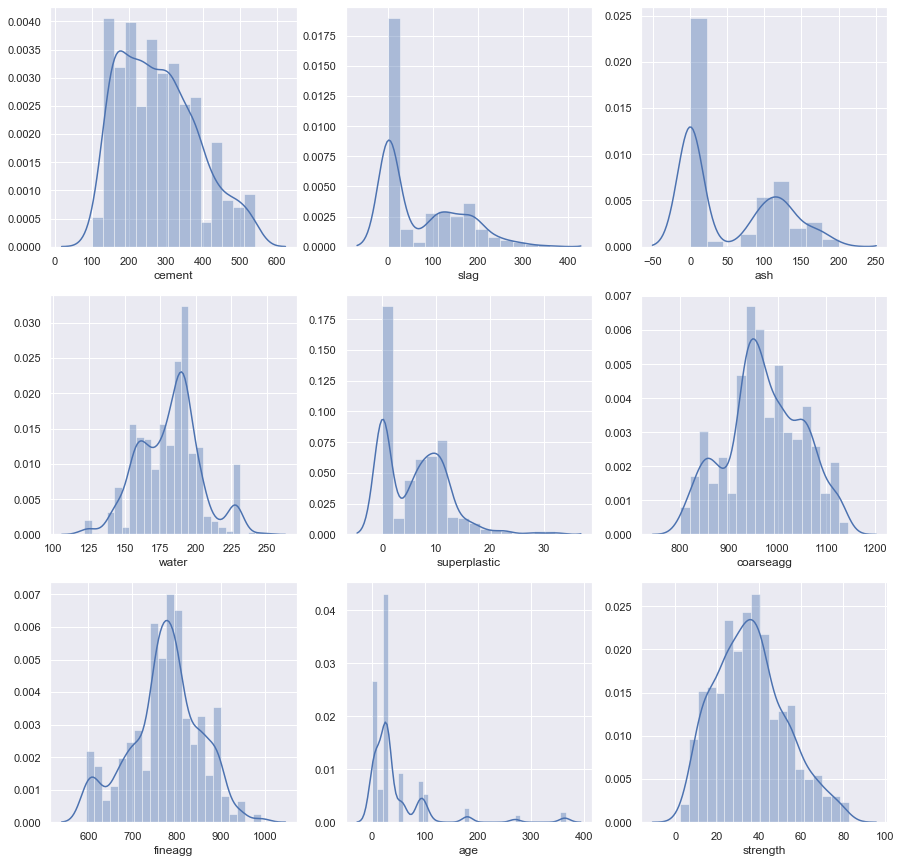

In [9]:
# display a distribution plot for each attribute using for loop

plt.figure(figsize=(15,15))
col_name = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength'] 
position = 1
for col in col_name:
    plt.subplot(3, 3, position)
    sns.distplot(df[col])
    position += 1
plt.show()

#### Observations:
- Most of attributes don't follow a normal distribution.
- Attributes strength and cement seem to have nearly a normal distribution

### 2. Bivariate Analysis

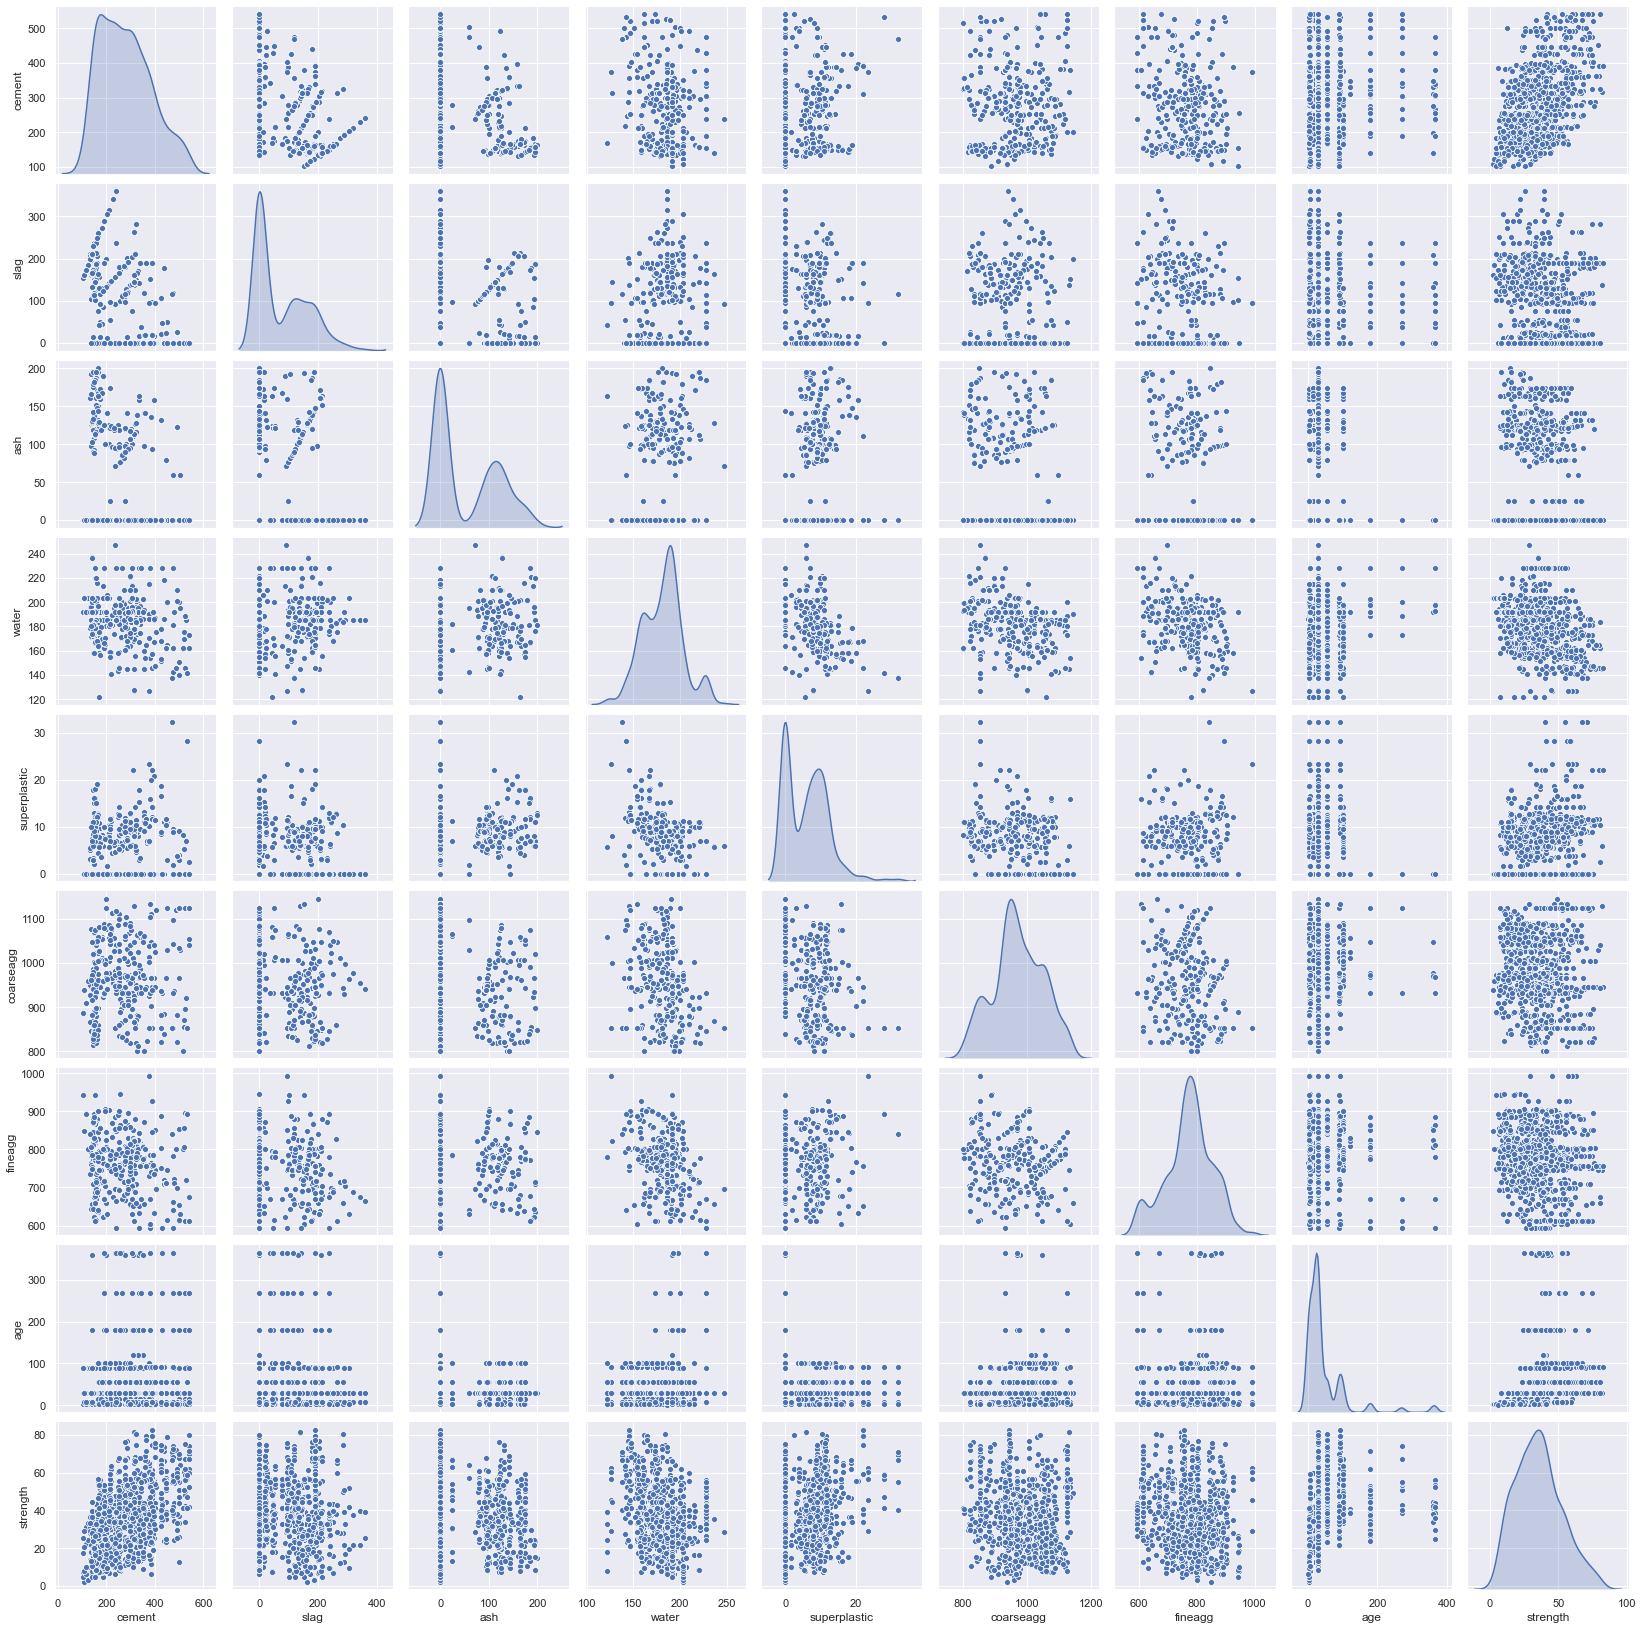

In [10]:
# print pairplot
sns.pairplot(df, diag_kind = 'kde')

In [11]:
# print correlation coefficients between different variables
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


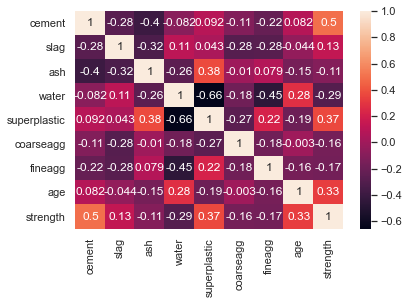

In [12]:
# print heatmap
sns.heatmap(df.corr(), annot=True)

#### Observations:
- Strength and cement attributes have nearly normal distributions.
- Age, ash, slag are skewed. Espacially age having a long tail which confirms the presence of outliers.
- Cement is positively correlated to strength.

### 3. Feature Engineering

From the previous analyses we can conclude that ash and slag are weak predictors. Let's drop the ash column.

In [13]:
# drop ash column
df = df.drop('ash', axis=1)
df.head()

,cement,slag,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,193.3,9.1,1047.4,696.7,28,18.29


In [14]:
# split the data into 70:30 train and test datasets
from sklearn.model_selection import train_test_split
X = df.drop('strength', axis=1)
y = df[['strength']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Linear Regression

In [15]:
# apply linear regression model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [16]:
# print the coefficients for each independant attribute
print('The coefficient for cement is ', reg.coef_[0][0])
print('The coefficient for slag is ', reg.coef_[0][1])
print('The coefficient for water is ', reg.coef_[0][2])
print('The coefficient for superplastic is ', reg.coef_[0][3])
print('The coefficient for coarseagg is ', reg.coef_[0][4])
print('The coefficient for fineagg is ', reg.coef_[0][5])
print('The coefficient for age is ', reg.coef_[0][6])

The coefficient for cement is  0.07320978386280659
The coefficient for slag is  0.04585928216099747
The coefficient for water is  -0.27121622971800674
The coefficient for superplastic is  0.4653139829248532
The coefficient for coarseagg is  -0.021249316680731878
The coefficient for fineagg is  -0.02203412565399583
The coefficient for age is  0.10441826335242302


In [17]:
# print the intercept
print('The intercept of the model is', reg.intercept_)

The intercept of the model is [91.02115709]


In [18]:
# print the score of the train data
reg.score(X_train, y_train)

0.5834824112904886

In [19]:
# print the score of the test data
reg.score(X_test, y_test)

0.6163499757004015

In [20]:
# calculate prediction for linear regression model
pred_reg = reg.predict(X_test)
# display metrics in a dataframe
df_reg = pd.DataFrame({'Algorithm': ['Linear Regression'], 'Coefficient of Determination': metrics.r2_score(y_test, pred_reg),
                      'Mean Absolute Error': metrics.mean_absolute_error(y_test, pred_reg),
                      'Mean Squared Error': metrics.mean_squared_error(y_test, pred_reg),
                      'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, pred_reg))})
df_reg

,Algorithm,Coefficient of Determination,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,0.61635,8.51751,111.657334,10.566803


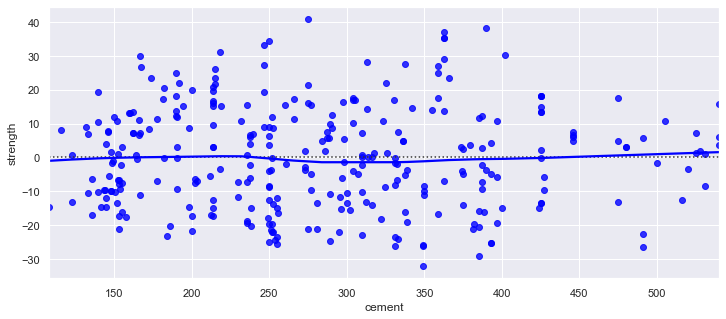

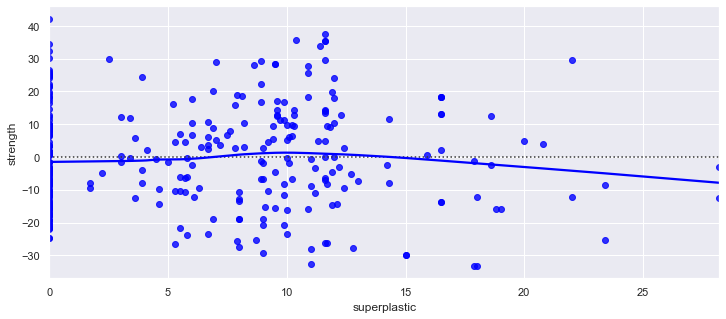

In [21]:
# check residuals for cement and superplastic predictors
fig = plt.figure(figsize=(12,5))
sns.residplot(x = X_test['cement'], y = y_test['strength'], color='blue', lowess=True)
fig = plt.figure(figsize=(12,5))
sns.residplot(x = X_test['superplastic'], y = y_test['strength'], color='blue', lowess=True)

We need a more complex model given the coefficient of dertermination and the other metrics which are not good enough. 

#### Create a regularized Ridge model

In [22]:
from sklearn.linear_model import Ridge 
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

Ridge(alpha=0.3)

In [23]:
# print the coefficients for each independant attribute
print('The coefficient for cement is ', ridge.coef_[0][0])
print('The coefficient for slag is ', ridge.coef_[0][1])
print('The coefficient for water is ', ridge.coef_[0][2])
print('The coefficient for superplastic is ', ridge.coef_[0][3])
print('The coefficient for coarseagg is ', ridge.coef_[0][4])
print('The coefficient for fineagg is ', ridge.coef_[0][5])
print('The coefficient for age is ', ridge.coef_[0][6])

The coefficient for cement is  0.07320969851765469
The coefficient for slag is  0.045859145359842465
The coefficient for water is  -0.27121898030631447
The coefficient for superplastic is  0.4653013335241106
The coefficient for coarseagg is  -0.021249814973125673
The coefficient for fineagg is  -0.022034399829343677
The coefficient for age is  0.10441822958606609


#### Create a regularized Lasso model

In [24]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.2)
lasso.fit(X_train, y_train)

Lasso(alpha=0.2)

In [25]:
lasso.coef_

array([ 0.07317194,  0.04577404, -0.27292833,  0.45470637, -0.02156541,
       -0.0221338 ,  0.1043137 ])

In [26]:
# print the coefficients for each independant attribute
print('The coefficient for cement is ', lasso.coef_[0])
print('The coefficient for slag is ', lasso.coef_[1])
print('The coefficient for water is ', lasso.coef_[2])
print('The coefficient for superplastic is ', lasso.coef_[3])
print('The coefficient for coarseagg is ', lasso.coef_[4])
print('The coefficient for fineagg is ', lasso.coef_[5])
print('The coefficient for age is ', lasso.coef_[6])

The coefficient for cement is  0.07317194415717995
The coefficient for slag is  0.0457740428344433
The coefficient for water is  -0.2729283333901331
The coefficient for superplastic is  0.45470637425846583
The coefficient for coarseagg is  -0.021565405653322565
The coefficient for fineagg is  -0.022133798972591517
The coefficient for age is  0.10431370070701612


#### Polynomial Features

In [27]:
# Linear model with polynomial features of degree 2
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
p = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = p.fit_transform(X_train)
X_test2 = p.fit_transform(X_test)

poly = linear_model.LinearRegression()

poly.fit(X_train2, y_train)
# calculate prediction
pred_poly = poly.predict(X_test2)

In [28]:
# print the score of the train data
print(poly.score(X_train2, y_train))

0.7324893999194342


In [29]:
# print the score of the test data
poly.score(X_test2, y_test)

0.7052740525146214

In [30]:
df_poly = pd.DataFrame({'Algorithm': ['Polynomial Features'], 'Coefficient of Determination': metrics.r2_score(y_test, pred_poly),
                      'Mean Absolute Error': metrics.mean_absolute_error(y_test, pred_poly),
                      'Mean Squared Error': metrics.mean_squared_error(y_test, pred_poly),
                      'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, pred_poly))})
dff = pd.concat([df_reg, df_poly])
dff

,Algorithm,Coefficient of Determination,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,0.616350,8.517510,111.657334,10.566803
0,Polynomial Features,0.705274,7.193354,85.776910,9.261582


Polynomial features have increased the coefficient of determination and decreased the mean absolute error, the mean squared error and the root mean squared error. However the coefficient of determination is only at 70.5%.

## Creating the model and tuning it

#### 1. RandomForest

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfrg = RandomForestRegressor(n_estimators=50, random_state=1)
rfrg.fit(X_train, y_train)
# calculate prediction
pred_rfrg = rfrg.predict(X_test)

In [32]:
# calculate score
print("RandomForest score is:", rfrg.score(X_test, y_test))

RandomForest score is: 0.9102934609268605


#### 2. GradientBoosting

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
gbrg = GradientBoostingRegressor(n_estimators=50, random_state=1)
gbrg.fit(X_train, y_train)
# calculate prediction
pred_gbrg = gbrg.predict(X_test)

In [34]:
# calculate score
print("GradientBoosting score is:", gbrg.score(X_test, y_test))

GradientBoosting score is: 0.8684637460379048


#### 3. Bagging

In [35]:
from sklearn.ensemble import BaggingRegressor
bgrg = BaggingRegressor(n_estimators=50, random_state=1)
bgrg.fit(X_train, y_train)
# calculate prediction
pred_bgrg = bgrg.predict(X_test)

In [36]:
# calculate score
print("Bagging score is:", bgrg.score(X_test, y_test))

Bagging score is: 0.909962311781591


### Kfold Cross-Validation

In [38]:
# K-fold cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [39]:
num_folds = 10
seed = 77

In [40]:
kfold = KFold(n_splits=num_folds, random_state=seed)

In [43]:
# print cross validation score of RandomForest model 
RandomForest_score = cross_val_score(rfrg,X, y, cv=kfold).mean()
RandomForest_score

0.916399837119549

In [44]:
# print cross validation score of GradientBoosting model 
GradientBoosting_score = cross_val_score(gbrg,X, y, cv=kfold).mean()
GradientBoosting_score

0.8762145309733487

In [45]:
# print cross validation score of Bagging model 
Bagging_score = cross_val_score(bgrg,X, y, cv=kfold).mean()
Bagging_score

0.9166155135459426

#### Compare the different models and present different metrics in a dataframe

In [46]:
df_rfrg = pd.DataFrame({'Algorithm': ['RandomForest'], 'Coefficient of Determination': metrics.r2_score(y_test, pred_rfrg),
                      'Mean Absolute Error': metrics.mean_absolute_error(y_test, pred_rfrg),
                      'Mean Squared Error': metrics.mean_squared_error(y_test, pred_rfrg),
                      'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, pred_rfrg)),
                       'Cross Validation Score': RandomForest_score})
df_gbrg = pd.DataFrame({'Algorithm': ['GradientBoosting'], 'Coefficient of Determination': metrics.r2_score(y_test, pred_gbrg),
                      'Mean Absolute Error': metrics.mean_absolute_error(y_test, pred_gbrg),
                      'Mean Squared Error': metrics.mean_squared_error(y_test, pred_gbrg),
                      'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, pred_gbrg)),
                       'Cross Validation Score': GradientBoosting_score})
df_bgrg = pd.DataFrame({'Algorithm': ['Bagging'], 'Coefficient of Determination': metrics.r2_score(y_test, pred_bgrg),
                      'Mean Absolute Error': metrics.mean_absolute_error(y_test, pred_bgrg),
                      'Mean Squared Error': metrics.mean_squared_error(y_test, pred_bgrg),
                      'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, pred_bgrg)),
                       'Cross Validation Score': Bagging_score})
dff2 = pd.concat([df_rfrg, df_gbrg, df_bgrg])
dff2

,Algorithm,Coefficient of Determination,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Cross Validation Score
0,RandomForest,0.910293,3.626341,26.108152,5.109614,0.916400
0,GradientBoosting,0.868464,4.735778,38.282253,6.187265,0.876215
0,Bagging,0.909962,3.619247,26.204529,5.119036,0.916616


### Use GridSearch or RandomSearch techniques

In [51]:
from sklearn.model_selection import GridSearchCV
# look at parameters used by RandomForest model
print(rfrg.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [52]:
param_grid = {
            "n_estimators" : [10,50,100],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }

In [68]:
gsrf = GridSearchCV(rfrg,param_grid,cv=10)
gsrf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(n_estimators=50, random_state=1),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [10, 50, 100]})

In [69]:
gsrf.best_estimator_

RandomForestRegressor(bootstrap=False, max_features='log2', random_state=1)

In [70]:
gsrf.cv_results_['mean_test_score']

array([0.88195551, 0.892017  , 0.89357254, 0.86838109, 0.8798443 ,
       0.88477489, 0.86838109, 0.8798443 , 0.88477489, 0.81791988,
       0.81560686, 0.81469076, 0.87480556, 0.88804633, 0.89426096,
       0.87480556, 0.88804633, 0.89426096])